How to Build Agents with Langraph

In [5]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [12]:
api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki_tools=WikipediaQueryRun(api_wrapper=api_wrapper)

In [13]:
wiki_tools

WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'c:\\Users\\nitis\\Desktop\\Agentic_Ai_Learning\\venv_agent_learning_world\\Lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=1, lang='en', load_all_available_meta=False, doc_content_chars_max=500))

In [14]:
wiki_tools.run({"query":"who is Mike Tyson"})

'Page: Mike Tyson\nSummary: Michael Gerard Tyson (born June 30, 1966) is an American former professional boxer who competed primarily between 1985 and 2005. Nicknamed "Iron Mike" and "Kid Dynamite" in his early career, and later known as "the Baddest Man on the Planet", Tyson is regarded as one of the greatest heavyweight boxers of all time. He reigned as the undisputed world heavyweight champion from 1987 to 1990.\nTyson won his first 19 professional fights by knockout, 12 of them in the first rou'

In [15]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [16]:
load_dotenv()

True

In [17]:
llm=ChatOpenAI(temperature=0,model="gpt-4o-mini")

In [22]:
tools=[wiki_tools]

#Tool Binding
llm_with_tools=llm.bind_tools(tools)

#Tool Calling
result=llm_with_tools.invoke("Hi Man")

result

result.content


'Hello! How can I assist you today?'

In [23]:
#Agent (Langraph)

from langgraph.prebuilt import create_react_agent
agent_executor=create_react_agent(llm,tools)

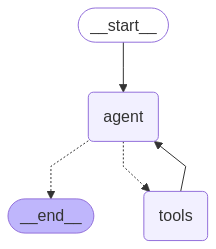

In [24]:
agent_executor

In [28]:
from langchain_core.messages import HumanMessage

#Scenario where there is no need to call the Agent

response=agent_executor.invoke({"messages":[HumanMessage(content="Hello Dear")]})

response["messages"]

[HumanMessage(content='Hello Dear', additional_kwargs={}, response_metadata={}, id='8fb60bd4-241e-419e-befa-47f4f8069c6d'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 83, 'total_tokens': 93, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_54eb4bd693', 'id': 'chatcmpl-BZIiQctkMGRpWuIfID56509eG02Hp', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--4355d1e3-3d4f-4770-bd0e-3cb3a3c1801e-0', usage_metadata={'input_tokens': 83, 'output_tokens': 10, 'total_tokens': 93, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [34]:
print(response["messages"][-1].content)

Hello! How can I assist you today?


In [35]:
#Scenario where there there is tool is called

response=agent_executor.invoke({"messages":[HumanMessage(content="who is Michael Jackson")]})

response["messages"]


[HumanMessage(content='who is Michael Jackson', additional_kwargs={}, response_metadata={}, id='619396cd-1cd5-4c51-b466-67442141a1f0'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_byLqJage9Nag7bKGLsFZQosI', 'function': {'arguments': '{"query":"Michael Jackson"}', 'name': 'wikipedia'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 85, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_54eb4bd693', 'id': 'chatcmpl-BZImnBVLl2IHe1ABHs4DIBAoKbUeO', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--12bc8678-b87b-4c57-9f54-559c999a4ba1-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Michael Jackson'}, 'id': 'call_byL

In [36]:
print(response["messages"][-1].content)

Michael Joseph Jackson (August 29, 1958 – June 25, 2009) was an American singer, songwriter, dancer, and philanthropist. Known as the "King of Pop," he is considered one of the most culturally significant figures of the 20th century. Over his four-decade career, Jackson broke racial barriers in America and became a dominant figure worldwide. He significantly influenced visual performance in popular music through his songs, stage presence, and fashion.
